<h1> Lab Assignment One: Exploring Table Data </h1> 
<br>
<i> Matthew Bartos </i>

<h3> 1. Business Understanding </h3> 

<i>Purpose:</i><br>
The classification dataset being analyzed is "Online Shoppers Purchasing Intention Dataset" from the UCI Machine Learning Repository. This data can be used to identify trends in online shopping and determine if making a sale is likely.  

<i>Dataset Description:</i><br>
The online shopping data was gathered from 12,000+ web sessions, each being unique users, and from different time periods throughout the year. These selection categories were used to gain more unbiased data; data not dependent on specific time period, user account, or special day. The dataset contains 10 numerical and 8 categorical attributes, giving more information about the user session. This data was collected so companies could have a better understanding of when and why a user would make an online purchase. 

The data was collected by examining a user’s session information. Using URL information, values regrading type of page and duration a user spent on pages were collected. Google Analytics provides metrics for a user’s activity on the website including “Bounce Rate,” (users leave without visiting another page) “Exit Rate,” (page where users left website) and “Page Value” (page that led to purchase). Since the dataset was collected over the course of a year, the “Special Day” feature indicates how close a purchase date is to a holiday such as Mother’s Day, Valentine’s Day, or Christmas. Finally basic values were determined on the server side including, returning/new customer, browser type, operating system, region, traffic type, and weekend value.

The end goal of analyzing a dataset like this would be determining what are the most important factors leading to a user’s purchases. It is also worth making head to head comparisons between certain categories, like returning versus new customer, to determine if these categories are significant factors in affecting a user’s purchase. If significant trends are identified, third parties could use these analytics to attract users of similar demographics to their website to increase sales.  

<i>Measure of Success: </i><br>
A learning algorithm when determining if a purchased was made, would have to be greater than random chance (50%) to have any significance at all. In Bogina's, Kuflik's, and Mokryn's purchasing predictions algorithms, they were able to achieve a success rate of 82.4% and 93.7% precision with two different trials/algorithms. Meaning, a machine learning algorithm from this data set needs to have around a 75% success rate to be comparable with Bogina's, Kuflik's, and Mokryn's alorithm.

When comparing between two categories of the dataset, a T-test could be used to see if there is a statistically significant difference between the two groups/categories. 


<i>Sources:</i><br>
Data: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset  <br>
Bogina, Kuflik, and Mokryn : https://essay.utwente.nl/74808/1/seippel_MA_eemcs.pdf (TABLE 2.1) <br>
T-test: https://writing.colostate.edu/guides/page.cfm?pageid=1398&guideid=67 


<h3> 2. Data Understanding </h3>

In [162]:
#panda import statements
import pandas as pd
import numpy as np
#matplot import statements
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 


#read in csv file
df = pd.read_csv('online_shoppers_intention.csv')

#replaced Month name with numerical inderiactors
#df.Month.replace(to_replace = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
#                 value = range(1,13), inplace = True)

df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Attributes such as operating systems, browsers, traffic type, and region did not need to be modified because they were already assigned numerical indicators.

In [163]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Based on the printed dataframe information, we can see there are no missing inputs from the datatable. (Each feature has a non-null count of 12330). Therefore there is no need to use stastical imuptation to add missing values.

In [164]:
#summary of data
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [165]:
import pandas as pd

#data frame
data_des = pd.DataFrame()

data_des['Features'] = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates','PageValues', 'VisitorType', 'Weekend', 'Special Day', 'Month', 'Revenue']
#browser, region, and traffic type etc. were excluded due to both simplcity and lack of information given by UCI's website
data_des['Description'] = ['Number of administrative pages visited', 'Time spent on administrative pages',
                           'Number of informational pages visited', 'Time spent on informational pages',
                           'Number of product related pages visited', 'Time spent on product related pages',
                           'leave without visiting another page', 'pages where users left website', 
                           'page that led to purchase', 'returning vs new customer', 'weekday or weekend', 'proximity to a holiday/special day', 'Month of the year', 'if sale was made']
data_des['Scales'] = ['Ordinal', 'Interval', 'Ordinal', 'Interval', 'Ordinal', 'Interval', 'Ratio', 'Ratio', 'Norminal', 'Norminal', 'Norminal', 'Interval', 'Norminal' , 'Norminal']
data_des['Discrete/Continous'] = ['Discrete', 'Continuous', 'Discrete', 'Continuous', 'Discrete', 'Continuous', 'Continuous', 'Continuous', 'Discrete', 'Discrete', 'Discrete', 'Continuous', 'Discrete' , 'Discrete']
data_des['Data Type'] = ['int', 'float', 'int', 'float', 'int', 'float', 'float', 'float', 'int' , 'bool', 'bool', 'float', 'int', 'bool']
data_des

,Features,Description,Scales,Discrete/Continous,Data Type
0,Administrative,Number of administrative pages visited,Ordinal,Discrete,int
1,Administrative_Duration,Time spent on administrative pages,Interval,Continuous,float
2,Informational,Number of informational pages visited,Ordinal,Discrete,int
3,Informational_Duration,Time spent on informational pages,Interval,Continuous,float
4,ProductRelated,Number of product related pages visited,Ordinal,Discrete,int
5,ProductRelated_Duration,Time spent on product related pages,Interval,Continuous,float
6,BounceRates,leave without visiting another page,Ratio,Continuous,float
7,ExitRates,pages where users left website,Ratio,Continuous,float
8,PageValues,page that led to purchase,Norminal,Discrete,int
9,VisitorType,returning vs new customer,Norminal,Discrete,bool


In [166]:
#checking for duplicate data
idx = df.duplicated()

# find the number of duplicate (not first show)
len(df[idx])

125

The duplicate data was to be removed. It is impossible to know if an entery is a duplicate because there is no identification attribute/number. However, it is very unlikely for multiple users to have the same browser, region, time spent on a page, and visit on the same time of the year. So it is logical to assume these enteries are duplicate data. On top of this, these duplicates comprise such a small fraction of the data so it has very little overall affect. 

In [167]:
df.drop_duplicates()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


When further examining the data, there were a small number of customer types that were not either "returner" or "new." These other customers were to be dropped from the data frame. The data set description gave us no indication or infomation on how to handle this extraneous data or what it means.

In [168]:
i = 0
for i in df.index:
    if(df['VisitorType'][i] == 'Other'):
        df = df.drop(i)

The data quality has now been verified. There is no missing data from the dataset, meaning no imputation has to take place. All duplicates have been examined and determined to be mistakes, so they were removed from the dataset. <br>

<h3> 3. Data Understanding </h3>

<h4> 3.1 Data Exploration </h4>

Categorizing basic features:

In [169]:
perSales = sum(df.Revenue == True) / len(df) * 100
perCustomer = sum(df.VisitorType == 'Returning_Visitor') / len(df) * 100

print('Percentage of customers who made a purchase:' , perSales)
print('Percentage of customers who did not make a purchase:' , (100 - perSales))
print('Percentage of returning customers: ' , perCustomer)
print('Percentage of new customers:' , (100 - perCustomer))

Percentage of customers who made a purchase: 15.451204573295222
Percentage of customers who did not make a purchase: 84.54879542670477
Percentage of returning customers:  86.16578195181707
Percentage of new customers: 13.834218048182933


The majority of customer traffic is returning customers rather than new customers. Majority of site visits do not end in a purchase.

<h4> 3.1.1 Product Related Duration </h4>

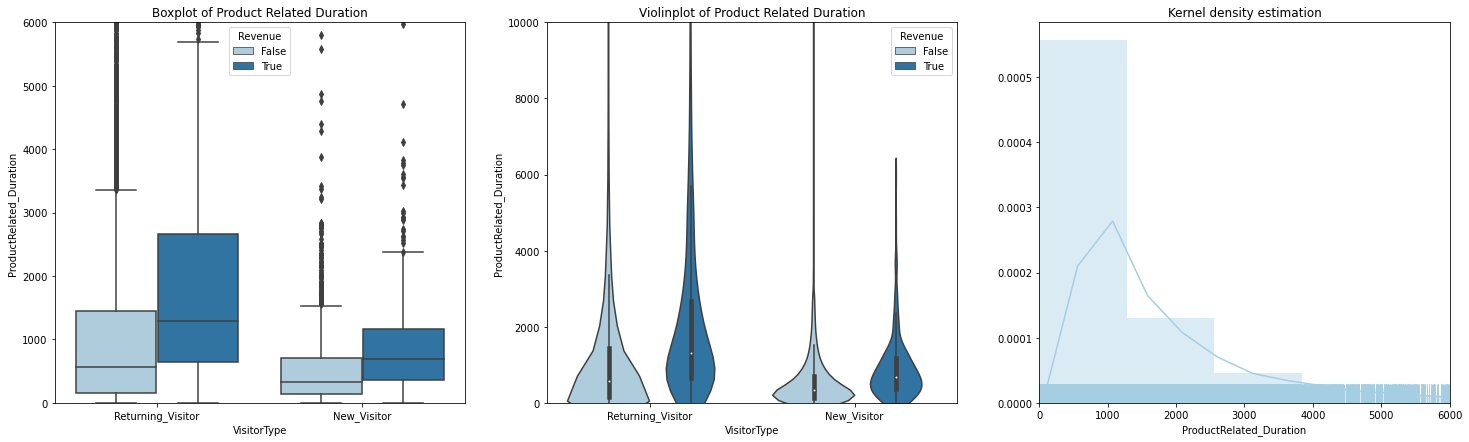

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 7))  
sns.set_palette("Paired")


plt.subplot(1,3,1)
ax1 = sns.boxplot(x ="VisitorType", y="ProductRelated_Duration", hue="Revenue", data=df)
plt.title('Boxplot of Product Related Duration')
plt.ylim(0, 6000) #excluding numbers greater than 6,000; mainly about the actual box plot


plt.subplot(1,3,2)
sns.violinplot(x ="VisitorType", y="ProductRelated_Duration", hue="Revenue", data=df)
plt.title('Violinplot of Product Related Duration')
plt.ylim(0, 10000)

plt.subplot(1,3,3)
sns.distplot(df.ProductRelated_Duration,  rug=True)
plt.title('Kernel density estimation')
plt.xlim(0,6000)

plt.show()

In [196]:
#describe basic features about the distrubution
df['ProductRelated_Duration'].describe()

count    12245.000000
mean      1199.080153
std       1916.732843
min          0.000000
25%        186.250000
50%        602.583333
75%       1472.000000
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

For both returning and new customers, website visits that ended in a purchase were more likely to have a higher product related duration. Returning visitors had larger varying product durations, meaning a wider spread distribution.

<h4> 3.1.2 Informational Related Duration </h4>

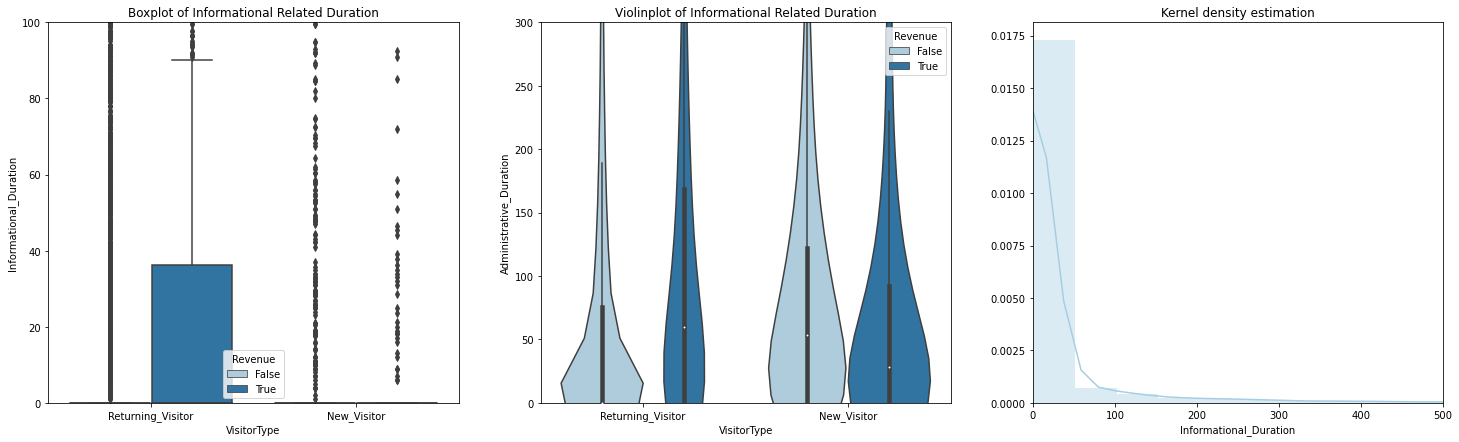

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 7))
                
plt.subplot(1,3,1)
ax1 = sns.boxplot(x ="VisitorType", y="Informational_Duration", hue="Revenue", data=df)
plt.title('Boxplot of Informational Related Duration')
plt.ylim(0, 100) #excluding numbers greater than 6,000; mainly about the actual box plot


plt.subplot(1,3,2)
sns.violinplot(x ="VisitorType", y="Administrative_Duration", hue="Revenue", data=df)
plt.title('Violinplot of Informational Related Duration')
plt.ylim(0, 300)

plt.subplot(1,3,3)
sns.distplot(df.Informational_Duration)
plt.title('Kernel density estimation')
plt.xlim(0,500)

plt.show()

In [199]:
#describe basic features about the distrubution
df['Informational_Duration'].describe()

count    12245.000000
mean        34.630576
std        141.137281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

A majority of website visitors did not even access an informational webpage. The majority of new website visitors did not even access an informational page. However, in returning visitors, accessing an informational page made a purchase much more likely.

<h4> 3.1.3 Administrative Related Duration </h4>

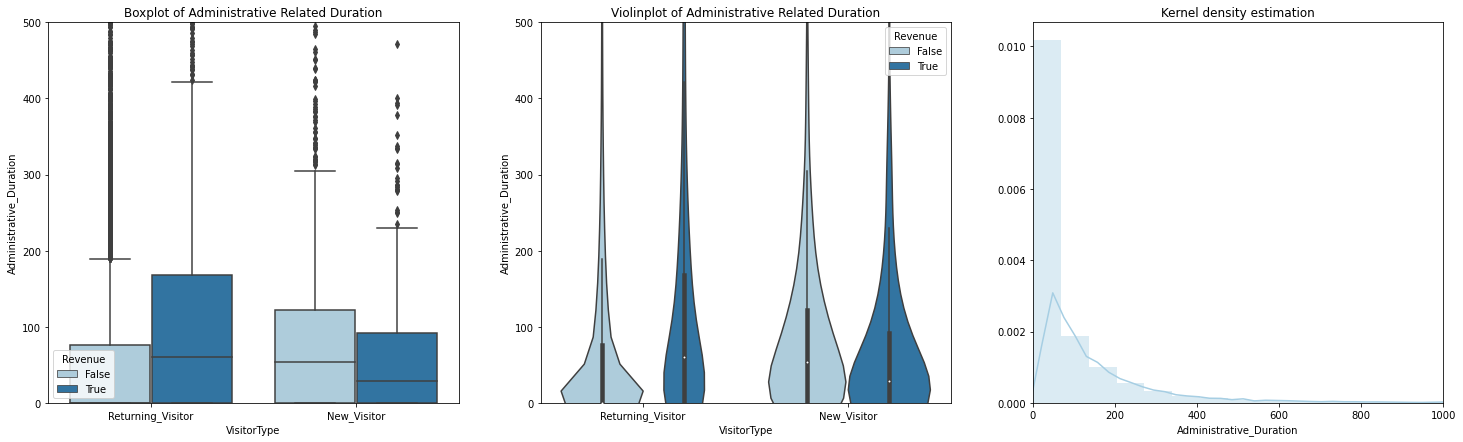

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(25, 7))

plt.subplot(1,3,1)
ax1 = sns.boxplot(x ="VisitorType", y="Administrative_Duration", hue="Revenue", data=df)
plt.title('Boxplot of Administrative Related Duration')
plt.ylim(0, 500) #excluding numbers greater than 6,000; mainly about the actual box plot


plt.subplot(1,3,2)
sns.violinplot(x ="VisitorType", y="Administrative_Duration", hue="Revenue", data=df)
plt.title('Violinplot of Administrative Related Duration')
plt.ylim(0, 500)


plt.subplot(1,3,3)
sns.distplot(df.Administrative_Duration)
plt.title('Kernel density estimation')
plt.xlim(0,1000)

plt.show()

In [202]:
#describe basic features about the distrubution
df['Administrative_Duration'].describe()

count    12245.000000
mean        80.944413
std        176.579347
min          0.000000
25%          0.000000
50%          8.000000
75%         93.600000
max       3398.750000
Name: Administrative_Duration, dtype: float64

Similarly to informational duration, there were a sizable number of users who did not visit an administrative page. Odly in new visitors, higher adminstrative time did not correlate with higher sales. However, this is not the case in Returning visitors. 

<h4> 3.1.4 Month Related Data </h4>

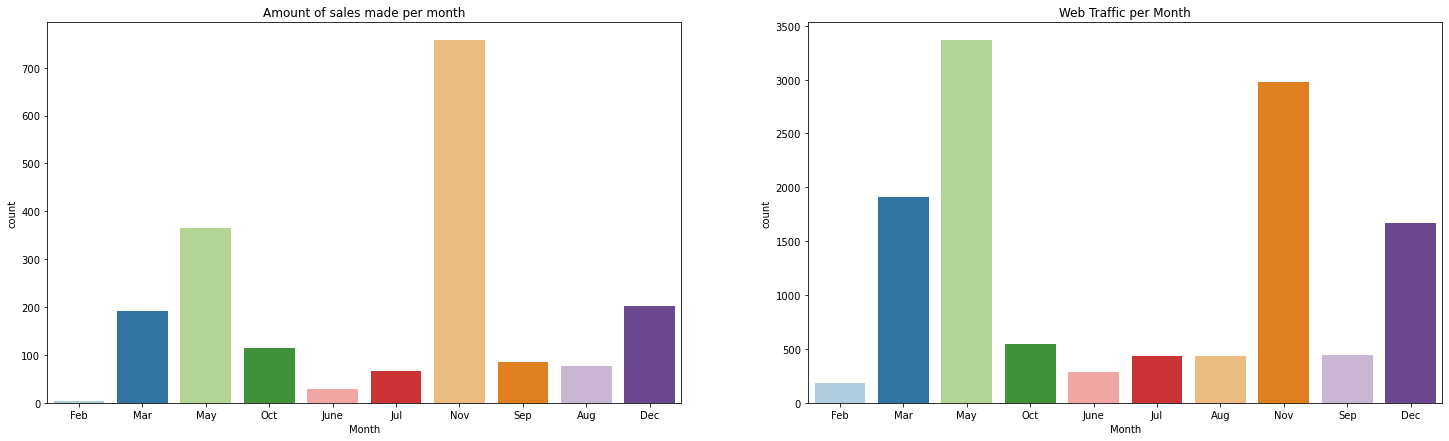

In [203]:
plt.subplots(figsize=(25, 7))
#only examine cases where revenue was made
temp = df
i = 0
for i in temp.index:
    if(df['Revenue'][i] == False):
        temp = temp.drop(i)

#count of number of sales made per month
plt.subplot(1,2,1)
sns.countplot(x='Month', data=temp)
plt.title('Amount of sales made per month')

#count of amount of web traffic per month
plt.subplot(1,2,2)
sns.countplot(x='Month', data=df)
plt.title('Web Traffic per Month')




plt.show()

In [204]:
df['Month'].value_counts() 

May     3364
Nov     2976
Mar     1907
Dec     1665
Oct      549
Sep      448
Aug      433
Jul      432
June     287
Feb      184
Name: Month, dtype: int64

In [205]:
df['Month'].describe()

count     12245
unique       10
top         May
freq       3364
Name: Month, dtype: object

The above count plots only contain the number of sales made per month, and how many web sessions were observed in that respective month. Meaning a ratio of sales made divided by web traffic per month is a way to think of highest perctange of sales. Meaning, months like November, October, and Decemeber had the highest probability of a purchase occuring. 

<h4> 3.1.5 Special Day Data </h4>

(0.0, 15.0)

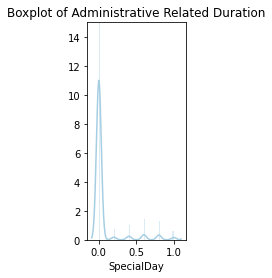

In [212]:
#number of special day ratings
plt.subplot(1,3,1)
sns.distplot(df.SpecialDay)
plt.title('Boxplot of Administrative Related Duration')
plt.ylim(0,15)

In [213]:
df['SpecialDay'].describe()

count    12245.000000
mean         0.061854
std          0.199540
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

In [214]:
df['SpecialDay'].value_counts() 

0.0    10994
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

Special day is a ratio/rating assigned determined by the proximity to a holiday or special day. Meaning, an increase in expected webtraffic and purchases. There are less days deemed with a special rating over 0.6/

<h3> 3.2 Data Exploration </h3>